# Differences Between Defaulted and Completed Loans
## by Ahmed Khalifa

## Investigation Overview

> The main goal of this investigation is to figure out the characteristics that differentiate completed from defaulted loans, to be able to better predict the outcome of a loan.

## Dataset Overview

> The dataset contains a large number of entries of different loans, with a wide variety of fata about each one, ranging from data about the loanee to data about the loan itself.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
loans = pd.read_csv('prosperLoanData.csv')
loans = loans[['Term', 'LoanStatus', 'BorrowerRate', 'ListingCategory (numeric)', 'EmploymentStatus', 
               'IsBorrowerHomeowner','CreditScoreRangeLower','CreditScoreRangeUpper', 'IncomeRange', 'IncomeVerifiable', 
               'StatedMonthlyIncome']]
loans.rename({'ListingCategory (numeric)' : 'ListingCategory'}, axis = 1, 
             inplace = True)
loans.dropna(inplace = True)
loans = loans.query('LoanStatus == "Completed" or LoanStatus ==  "Defaulted"')
loans['MeanCreditScore'] = (loans['CreditScoreRangeLower'] + loans['CreditScoreRangeUpper'])/2
loans.drop(['CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis = 1, inplace = True)
loans = loans[loans['MeanCreditScore'] > 200]
cat_term = pd.api.types.CategoricalDtype([12, 36, 60], ordered = True)
loans['Term'] = loans['Term'].astype(cat_term)
category_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal',
                 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure',
                 11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases',
                 15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding'}
loans.ListingCategory.replace(category_dict, inplace = True)
cat_income = pd.api.types.CategoricalDtype(['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'], ordered = True)
loans['IncomeRange'] = loans['IncomeRange'].astype(cat_income)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Defaulted Vs. Completed Loans Count

> In this bar chart, we can see that a significant portion of loans are defaulted, which is a problem that needs to be mitigated.

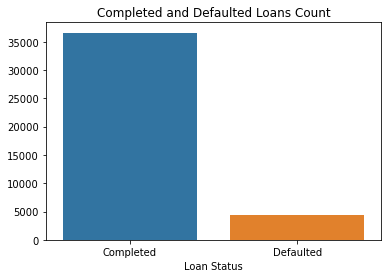

In [3]:
sns.countplot(data = loans, x = 'LoanStatus')
plt.title('Completed and Defaulted Loans Count')
plt.xlabel('Loan Status')
plt.ylabel('');

## Loan Term

> We can notice for the pie charts that ones(12-month term) are the most likely to be completed by a siginifcant margin.

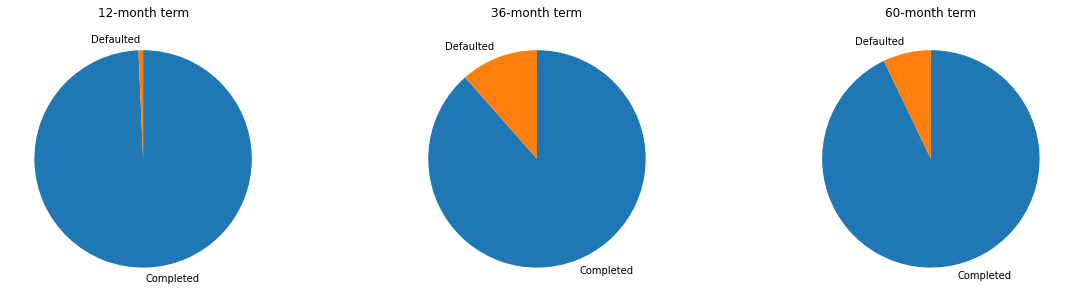

In [4]:
plt.figure(figsize = [20,5])

plt.subplot(1,3,1)
counts_12 = loans[loans['Term'] == 12].LoanStatus.value_counts()
plt.pie(counts_12, labels = counts_12.index, startangle = 90, counterclock = False);
plt.title('12-month term')

plt.subplot(1,3,2)
counts_36 = loans[loans['Term'] == 36].LoanStatus.value_counts()
plt.pie(counts_36, labels = counts_36.index, startangle = 90, counterclock = False);
plt.title('36-month term')

plt.subplot(1,3,3)
counts_60 = loans[loans['Term'] == 60].LoanStatus.value_counts()
plt.pie(counts_60, labels = counts_60.index, startangle = 90, counterclock = False);
plt.title('60-month term');

## Interest Rate

> We can notice from the two graphs that defaulted loans tend to have a higher interest rate, which is very logical. The higher interest rate will definitely make repaying the loan harder.

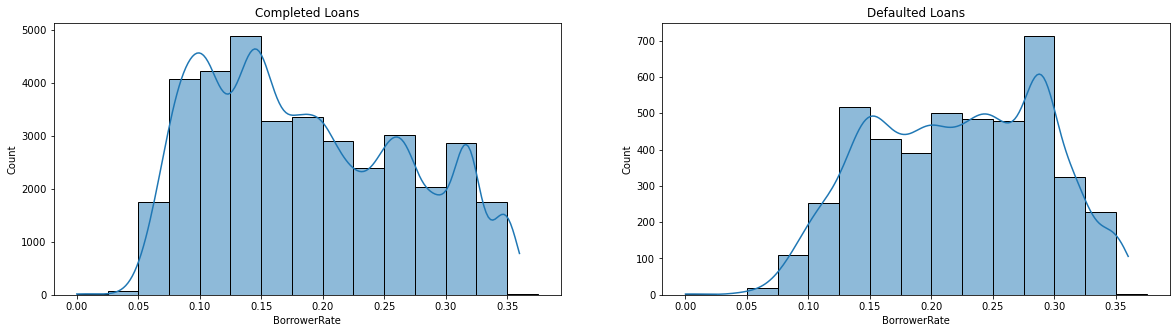

In [5]:
plt.figure(figsize = [20,5])
bins = np.arange(0, 0.4, 0.025)
plt.subplot(1,2,1)
sns.histplot(data = loans[loans['LoanStatus'] == 'Completed'], x = 'BorrowerRate', bins = bins, kde = True)
plt.title('Completed Loans')
plt.subplot(1,2,2)
sns.histplot(data = loans[loans['LoanStatus'] == 'Defaulted'], x = 'BorrowerRate', bins = bins, kde = True)
plt.title('Defaulted Loans');

## Credit Score

> We can notice from the graph that loanees with higher credit score are morelikely to complete their loans.

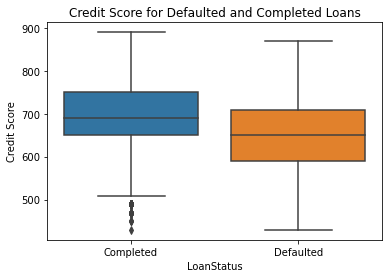

In [6]:
sns.boxplot(data = loans, y = 'MeanCreditScore', x = 'LoanStatus')
plt.ylabel('Credit Score')
plt.title('Credit Score for Defaulted and Completed Loans');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert Presentation.ipynb --to slides --post serve --no-input --no-prompt